In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gooleh","key":"6b2d6cf1b5601f4bdb219342f8125855"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 94% 324M/346M [00:05<00:00, 46.0MB/s]
100% 346M/346M [00:05<00:00, 67.5MB/s]


In [4]:
!unzip -q intel-image-classification.zip

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- 데이터 준비 ---
train_dir = '/content/seg_train/seg_train/'
validation_dir = '/content/seg_test/seg_test/'

# 이미지 크기 및 에포크 설정
TARGET_SIZE = (100, 100)
EPOCHS = 10

train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    batch_size=128,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=TARGET_SIZE,
    batch_size=128,
    class_mode='categorical')


# --- 기준 모델 구성 ---
model_baseline = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

model_baseline.compile(loss='categorical_crossentropy',
                       optimizer=Adam(learning_rate=0.001),
                       metrics=['accuracy'])

print("--- [기준 모델] 학습 시작 ---")
history_baseline = model_baseline.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=1
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
--- [기준 모델] 학습 시작 ---
Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 57s 466ms/step - accuracy: 0.4126 - loss: 1.4541 - val_accuracy: 0.6376 - val_loss: 0.9747
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6641 - loss: 1.0399 - val_accuracy: 0.6423 - val_loss: 0.9569
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 47s 436ms/step - accuracy: 0.6148 - loss: 0.9940 - val_accuracy: 0.7089 - val_loss: 0.7935
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6719 - loss: 0.8797 - val_accuracy: 0.7177 - val_loss: 0.7742
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 80s 441ms/step - accuracy: 0.6667 - loss: 0.8947 - val_accuracy: 0.7425 - val_loss: 0.7012
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6875 - loss: 0.8143 - val_accuracy: 0.7425 - val_loss: 0.7135
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 82s 463ms/step - accuracy: 0.6984 - loss: 0.8080 - val_accuracy: 0.7432 -

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- 데이터 준비 ---
train_dir = '/content/seg_train/seg_train/'
validation_dir = '/content/seg_test/seg_test/'

# 이미지 크기 및 에포크 설정
TARGET_SIZE = (100, 100)
EPOCHS = 10

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=TARGET_SIZE, batch_size=128, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=TARGET_SIZE, batch_size=128, class_mode='categorical')


# --- 심층 모델 구성 ---
model_deeper = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # ★★★ [실험 1] 변경점: 합성곱 층 한 세트 추가 ★★★
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

model_deeper.compile(loss='categorical_crossentropy',
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])

print("--- [실험 1: 심층 모델] 학습 시작 ---")
history_deeper = model_deeper.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=1
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
--- [실험 1: 더 깊은 모델] 학습 시작 ---
Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 54s 455ms/step - accuracy: 0.3880 - loss: 1.4659 - val_accuracy: 0.6464 - val_loss: 0.9603
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5703 - loss: 1.0519 - val_accuracy: 0.6389 - val_loss: 0.9684
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 82s 749ms/step - accuracy: 0.5718 - loss: 1.0726 - val_accuracy: 0.6355 - val_loss: 1.0390
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6172 - loss: 0.9673 - val_accuracy: 0.6369 - val_loss: 1.0203
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 81s 750ms/step - accuracy: 0.6357 - loss: 0.9427 - val_accuracy: 0.7238 - val_loss: 0.7629
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6797 - loss: 0.8004 - val_accuracy: 0.6807 - val_loss: 0.8395
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 47s 429ms/step - accuracy: 0.6787 - loss: 0.8508 - val_accuracy: 

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- 데이터 준비 ---
train_dir = '/content/seg_train/seg_train/'
validation_dir = '/content/seg_test/seg_test/'

# 이미지 크기 및 에포크 설정
TARGET_SIZE = (100, 100)
EPOCHS = 10

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=TARGET_SIZE, batch_size=128, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=TARGET_SIZE, batch_size=128, class_mode='categorical')


model_lr = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

# ★★★ [실험 2] 학습률(learning_rate) 조정 ★★★
model_lr.compile(loss='categorical_crossentropy',
                 optimizer=Adam(learning_rate=0.0001), # 학습률 0.001 -> 0.0001
                 metrics=['accuracy'])
# ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

print("--- [실험 2: 학습률 변경 모델] 학습 시작 ---")
history_lr = model_lr.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=1
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
--- [실험 2: 학습률 변경 모델] 학습 시작 ---
Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 453ms/step - accuracy: 0.4006 - loss: 1.5002 - val_accuracy: 0.5700 - val_loss: 1.1348
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5078 - loss: 1.1394 - val_accuracy: 0.5622 - val_loss: 1.1401
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 75s 426ms/step - accuracy: 0.5716 - loss: 1.1238 - val_accuracy: 0.6264 - val_loss: 1.0602
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5859 - loss: 1.1512 - val_accuracy: 0.6382 - val_loss: 1.0248
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 47s 429ms/step - accuracy: 0.6189 - loss: 1.0134 - val_accuracy: 0.6726 - val_loss: 0.9155
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5781 - loss: 1.0861 - val_accuracy: 0.6732 - val_loss: 0.9227
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 82s 452ms/step - accuracy: 0.6416 - loss: 0.9543 - val_accuracy

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- 데이터 준비 ---
train_dir = '/content/seg_train/seg_train/'
validation_dir = '/content/seg_test/seg_test/'

# 이미지 크기 및 에포크 설정
TARGET_SIZE = (100, 100)
EPOCHS = 10

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=TARGET_SIZE, batch_size=128, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=TARGET_SIZE, batch_size=128, class_mode='categorical')


# --- [실험 3] 드롭아웃 비율 조정 모델 구성 ---
model_dropout = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),

    # ★★★ [실험 3] 드롭아웃(Dropout) 비율 조정 ★★★
    Dropout(0.7), # 드롭아웃 비율 0.5 -> 0.7
    # ★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

model_dropout.compile(loss='categorical_crossentropy',
                      optimizer=Adam(learning_rate=0.001),
                      metrics=['accuracy'])

print("--- [실험 3: 드롭아웃 비율 조정 모델] 학습 시작 ---")
history_dropout = model_dropout.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=1
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
--- [실험 3: 드롭아웃 비율 조정 모델] 학습 시작 ---
Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 53s 452ms/step - accuracy: 0.4317 - loss: 1.4079 - val_accuracy: 0.6447 - val_loss: 0.9375
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6016 - loss: 0.9414 - val_accuracy: 0.6613 - val_loss: 0.9429
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 82s 755ms/step - accuracy: 0.6223 - loss: 0.9823 - val_accuracy: 0.6844 - val_loss: 0.8453
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6406 - loss: 0.9349 - val_accuracy: 0.7245 - val_loss: 0.7673
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 142s 775ms/step - accuracy: 0.6692 - loss: 0.8729 - val_accuracy: 0.7378 - val_loss: 0.7328
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6641 - loss: 0.8840 - val_accuracy: 0.7269 - val_loss: 0.7573
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 142s 797ms/step - accuracy: 0.6959 - loss: 0.8119 - val_ac

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,650,438 (25.37 MB)

 Trainable params: 6,650,438 (25.37 MB)

 Non-trainable params: 0 (0.00 B)


--- 최종 모델 학습 시작 (Epochs: 25) ---
Epoch 1/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 447ms/step - accuracy: 0.4364 - loss: 1.3633 - val_accuracy: 0.5883 - val_loss: 1.1373
Epoch 2/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5938 - loss: 1.0502 - val_accuracy: 0.5978 - val_loss: 1.0704
Epoch 3/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 47s 435ms/step - accuracy: 0.6168 - loss: 0.9944 - val_accuracy: 0.7520 - val_loss: 0.7234
Epoch 4/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6641 - loss: 0.8647 - val_accuracy: 0.7490 - val_loss: 0.7317
Epoch 5/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 82s 451ms/step - accuracy: 0.6698 - loss: 0.8615 - val_accuracy: 0.7565 - val_loss: 0.6940
Epoch 6/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7656 - loss: 0.7437 - val_accuracy: 0.7571 - val_loss: 0.7034
Epoch 7/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 448ms/step - accuracy: 0.7022 - loss: 0.7974 - val_accuracy: 0.7432 - val_loss: 0.7238
Epoch 8/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - 

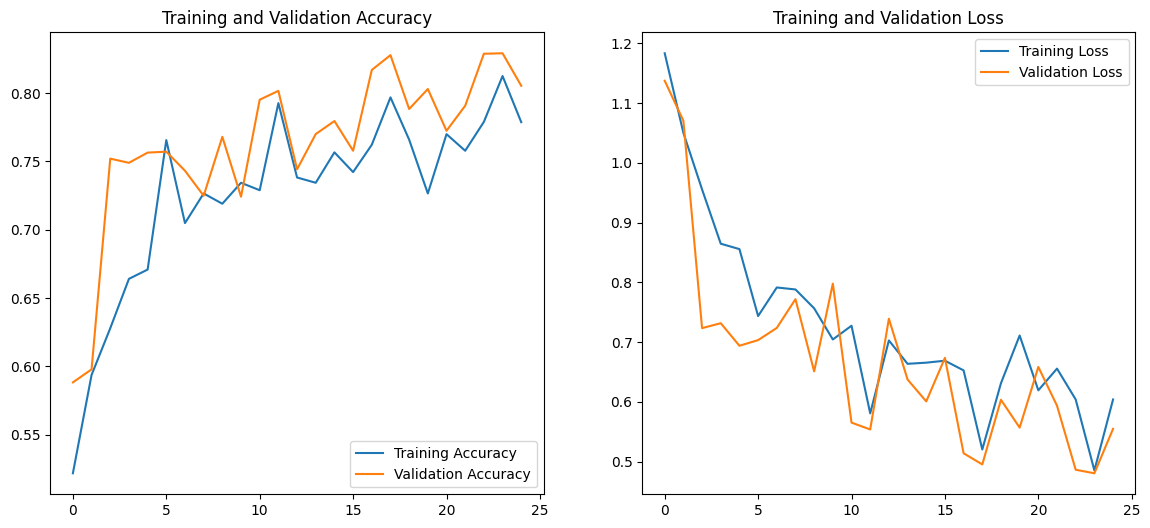


--- 최종 모델 성능 평가 ---
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.8079 - loss: 0.5502
Final Validation Loss: 0.5561
Final Validation Accuracy: 0.8057


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- 데이터 준비 ---
train_dir = '/content/seg_train/seg_train/'
validation_dir = '/content/seg_test/seg_test/'

# 이미지 크기 및 최종 에포크 설정
TARGET_SIZE = (100, 100)
FINAL_EPOCHS = 25

# 데이터 생성기 (Data Augmentation 포함)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=TARGET_SIZE,
    batch_size=128,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=TARGET_SIZE,
    batch_size=128,
    class_mode='categorical'
)

# --- 최종 모델 구성 ---
# 가장 잠재력이 높았던 Dropout(0.7) 모델 구조
final_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.7), # 규제 강화를 위해 Dropout 비율을 높게 유지
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

# 모델 컴파일
final_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 최종 모델 구조 요약 출력
final_model.summary()

print("\n--- 최종 모델 학습 시작 (Epochs: 25) ---")

# 최종 모델 학습 실행
history_final = final_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=FINAL_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=1
)

# 학습 결과 시각화
acc = history_final.history['accuracy']
val_acc = history_final.history['val_accuracy']
loss = history_final.history['loss']
val_loss = history_final.history['val_loss']
epochs_range = range(FINAL_EPOCHS)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 최종 성능 평가
print("\n--- 최종 모델 성능 평가 ---")
final_loss, final_accuracy = final_model.evaluate(validation_generator)
print(f"Final Validation Loss: {final_loss:.4f}")
print(f"Final Validation Accuracy: {final_accuracy:.4f}")